<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/SVM_Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Pharma_Industry.csv')

In [3]:
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


It appears as though the cols are already scaled as the values lie between a specific range. Columns appear to be standardized, so we can use these values as it for our model.

In [6]:
df_cols = df.columns

In [12]:
df_cols

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

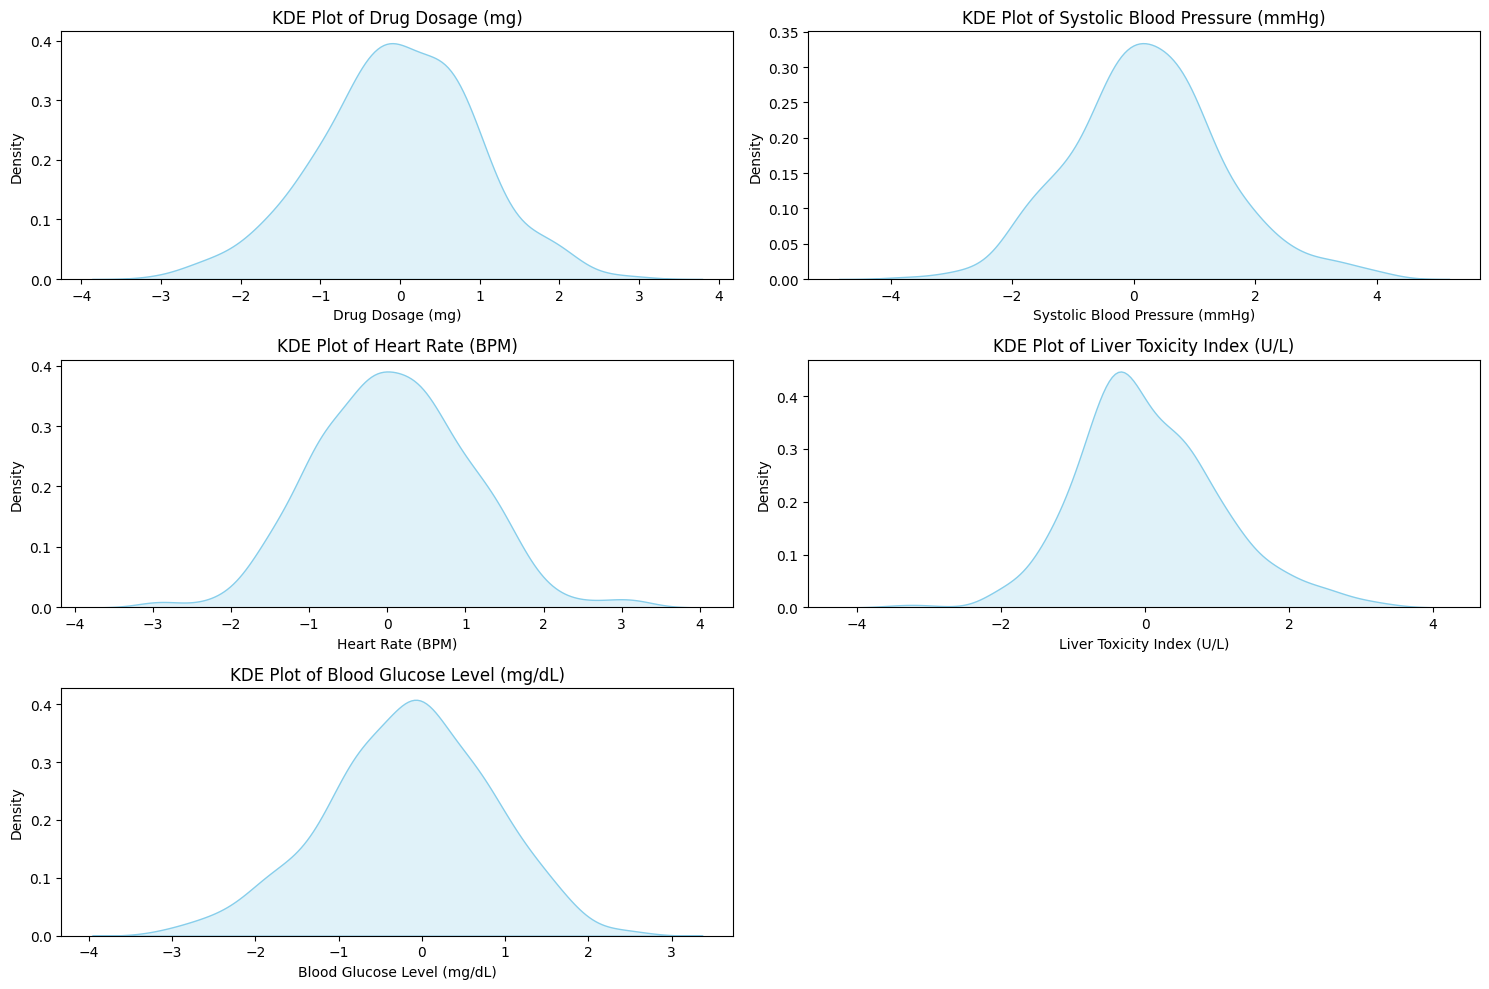

In [20]:
plt.figure(figsize=(15, 10))
num_cols = len(df_cols) - 1 # Exclude 'Drug Response'
num_rows = (num_cols + 1) // 2 # Calculate number of rows needed for subplots

for i, col in enumerate(df_cols):
    if col != 'Drug Response':
        plt.subplot(num_rows, 2, i + 1) # Create subplots (2 columns per row)
        sns.kdeplot(df[col], fill=True, color='skyblue')
        plt.title(f'KDE Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')

plt.tight_layout()
plt.show()

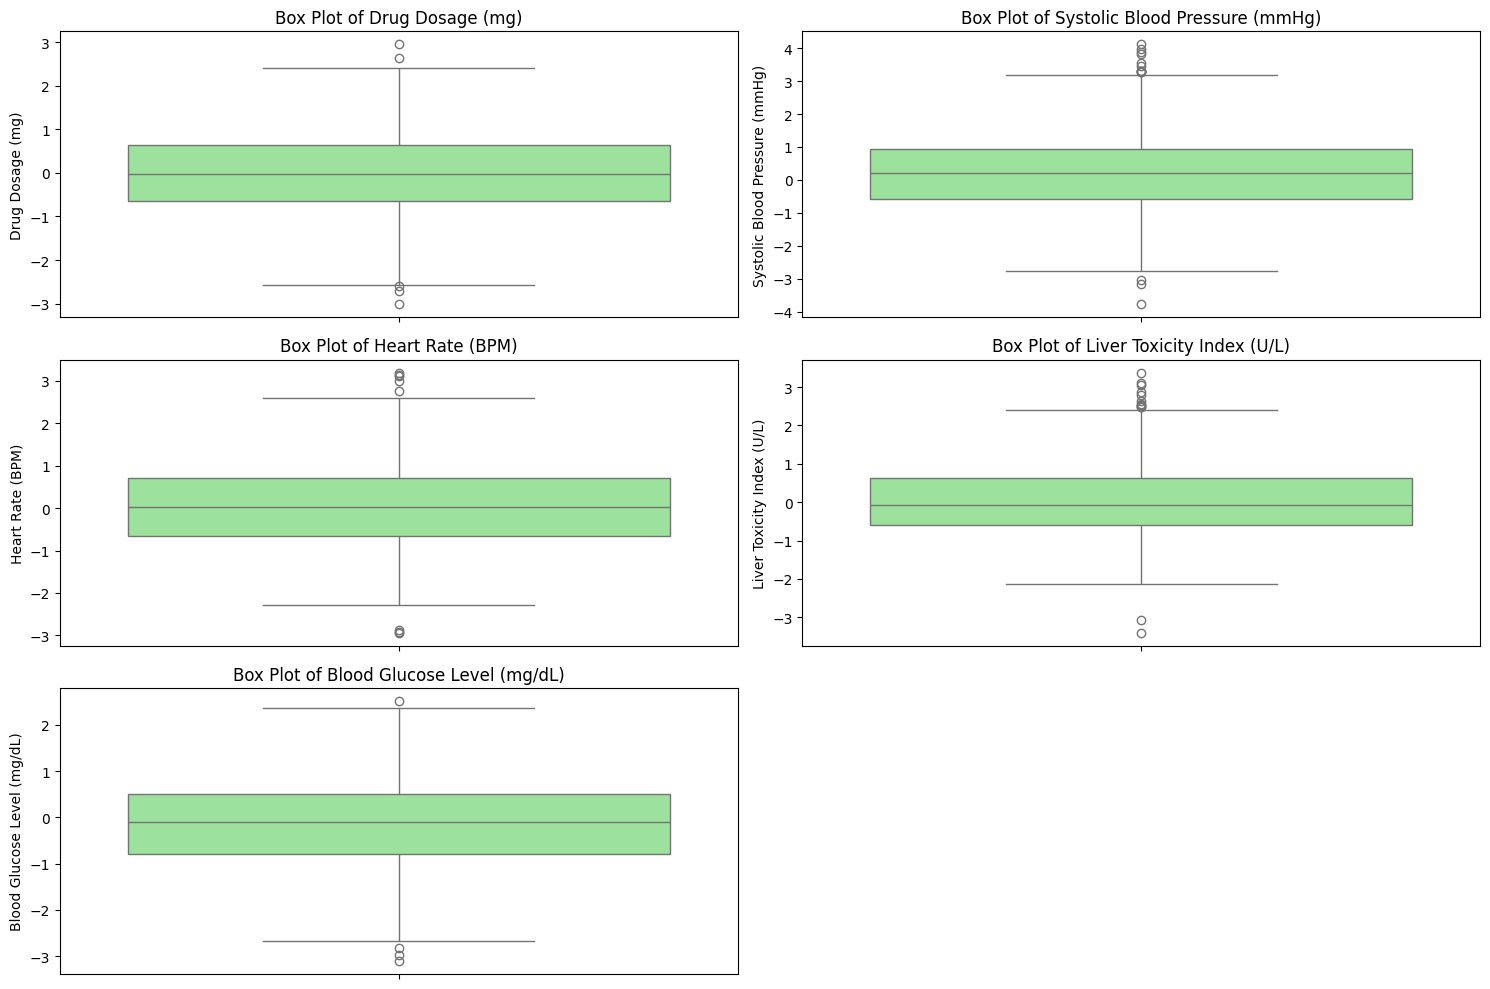

In [21]:
plt.figure(figsize=(15, 10))
num_cols = len(df_cols) - 1 # Exclude 'Drug Response'
num_rows = (num_cols + 1) // 2 # Calculate number of rows needed for subplots

for i, col in enumerate(df_cols):
    if col != 'Drug Response':
        plt.subplot(num_rows, 2, i + 1) # Create subplots (2 columns per row)
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3520189022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug Response', y=df[col], data=df, palette='viridis')
/tmp/ipython-input-3520189022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug Response', y=df[col], data=df, palette='viridis')
/tmp/ipython-input-3520189022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug Response', y=df[col], data=df, palette='viridis')
/tmp/ipython-input-3520189022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

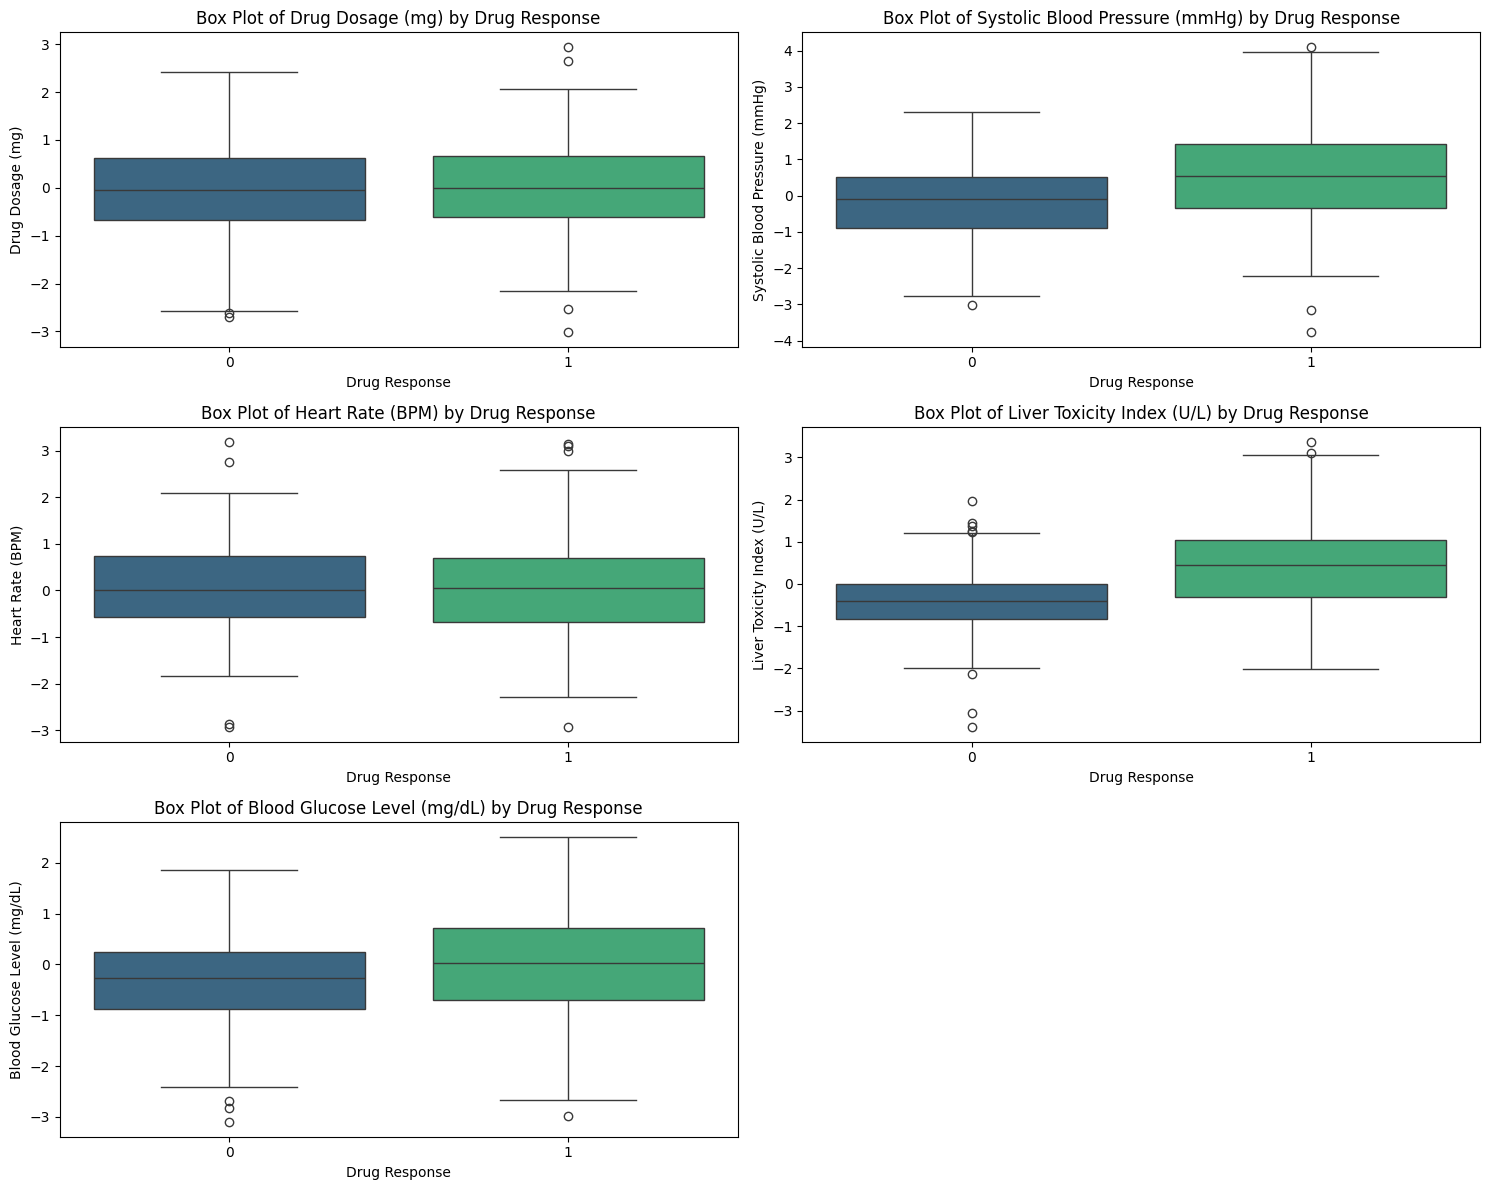

In [23]:
plt.figure(figsize=(15, 12))
num_cols_to_plot = len(df_cols) - 1 # Exclude 'Drug Response'
num_rows = (num_cols_to_plot + 1) // 2 # Calculate number of rows needed for subplots

for i, col in enumerate(df_cols):
    if col != 'Drug Response':
        plt.subplot(num_rows, 2, i + 1)
        sns.boxplot(x='Drug Response', y=df[col], data=df, palette='viridis', hue='Drug Response', legend=False)
        plt.title(f'Box Plot of {col} by Drug Response')
        plt.xlabel('Drug Response')
        plt.ylabel(col)

plt.tight_layout()
plt.show()

In [22]:
# Select the 'Systolic Blood Pressure (mmHg)' column
column = 'Systolic Blood Pressure (mmHg)'
data = df[column]

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Outliers in '{column}':")
display(outliers)

Outliers in 'Systolic Blood Pressure (mmHg)':


,Systolic Blood Pressure (mmHg)
89,3.889688
134,3.292380
138,3.266524
140,-3.154520
187,3.546212
204,4.111751
251,3.961330
272,3.275516
304,3.301525
353,3.828979


There appear to be many outliers in the data, but for medical datasets, extreme values may provide info about high-risk patients, so we wont remove these values.

In [18]:
df['Drug Response'].value_counts()

,count
Drug Response,
1,260
0,240


Data is balanced.

# Model Building

In [25]:
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [


    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },


    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    },


    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },


    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
]

svc = SVC()

grid = GridSearchCV(
    svc,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best kernel:", grid.best_params_['kernel'])
print("Best params:", grid.best_params_)


Best kernel: rbf
Best params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [29]:
best_model = grid.best_estimator_
print(grid.best_params_)


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [30]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.70      0.75      0.72        52

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



We can change the threshold value to improve accuracy, precison and F1 score.

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

y_scores = best_model.decision_function(X_test)
auc = roc_auc_score(y_test, y_scores)


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)


In [33]:
J = tpr - fpr
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)


Best threshold: 0.28472574417490915


In [34]:
target_recall = 0.90
idx = np.where(tpr >= target_recall)[0][0]
best_threshold = thresholds[idx]

print("Threshold for 90% recall:", best_threshold)


Threshold for 90% recall: -0.7215442893461192


In [35]:
dist = np.sqrt((1 - tpr)**2 + fpr**2)
best_idx = np.argmin(dist)
best_threshold = thresholds[best_idx]


In [36]:
y_pred_custom = (y_scores >= best_threshold).astype(int)


In [38]:
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.73      0.83      0.78        48
           1       0.82      0.71      0.76        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100

